# Machine Learning Portfolio
## Unsupervised Learning
## Author: Brandon Pippin

## Project: Fertilizer Usage In US from 1964 - 2010 




This is a modified notebook based on a Udacity clustering / PCA project. I'm modifying it to be more of a 'deliverable' for analysis of other datasets.



The Input File, mergedData.csv, was produced using data from data.gov preprocessed using my OrangeML .ows file 'Multiple Dataset Merge.ows' in the OrangeML folder.

## Introduction






In [20]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("/Users/brandonpippin/Documents/GitHub/Portfolio/OrangeML/fertilizeruse/mergedData.csv")
    #data.drop([''], axis = 1, inplace = True)
    print "Commodity Flow dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"
    
data = data.sample(n=46)

print "Subset of Commodity Flow dataset has {} samples with {} features each.".format(*data.shape)

Commodity Flow dataset has 46 samples with 10 features each.
Subset of Commodity Flow dataset has 46 samples with 10 features each.


## Data Exploration


This section provides a statistical description of the dataset, considers the relevance of each feature, and selects a few sample data points from the dataset which you will track through the course of this report.



In [21]:
# Display a description of the dataset
display(data.describe())

,NITROGENusedForCorn,NITROGENusedForCotton,NITROGENusedForSoybeans,NITROGENusedForWheat,NITROGENusedForOther,TOTALUSNitrogen (N),TOTALUSPhosphate (P2O5),TOTALUSPotash (K2O),Total_US_ALL,Year ending June 30
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,4426.652174,419.869565,105.000000,1457.456522,3913.543478,10322.652174,4522.978261,4861.434783,19706.717391,1986.500000
std,902.491864,105.546537,38.341738,532.321987,998.127017,2300.439873,521.504085,830.383409,3213.475416,13.422618
min,1623.000000,218.000000,16.000000,353.000000,1589.000000,4353.000000,3138.000000,2730.000000,10460.000000,1964.000000
25%,3903.750000,343.000000,80.500000,1079.750000,3335.750000,9134.500000,4248.750000,4651.750000,18045.750000,1975.250000
50%,4712.500000,404.500000,106.500000,1670.000000,3884.500000,11084.000000,4514.000000,4991.500000,20783.500000,1986.500000
75%,4903.750000,506.500000,137.750000,1850.500000,4807.250000,12035.250000,4811.250000,5265.500000,21768.250000,1997.750000
max,5714.000000,700.000000,175.000000,2208.000000,5621.000000,13194.000000,5630.000000,6320.000000,23678.000000,2009.000000


In [22]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [ 1,2,3,]

# Create a DataFrame of the chosen samples
samples = data.sample(n=5)

print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,NITROGENusedForCorn,NITROGENusedForCotton,NITROGENusedForSoybeans,NITROGENusedForWheat,NITROGENusedForOther,TOTALUSNitrogen (N),TOTALUSPhosphate (P2O5),TOTALUSPotash (K2O),Total_US_ALL,Year ending June 30
6,3520.0,323.0,63.0,580.0,2974.0,7459.0,4574.0,4036.0,16068.0,1970.0
43,5714.0,441.0,121.0,1689.0,5229.0,13194.0,4572.0,5133.0,22899.0,2007.0
28,4887.0,466.0,98.0,1889.0,4106.0,11446.0,4218.0,5042.0,20706.0,1992.0
39,4710.0,508.0,154.0,1804.0,4916.0,12092.0,4291.0,4950.0,21333.0,2003.0
20,5391.0,343.0,115.0,1866.0,3377.0,11092.0,4901.0,5797.0,21790.0,1984.0


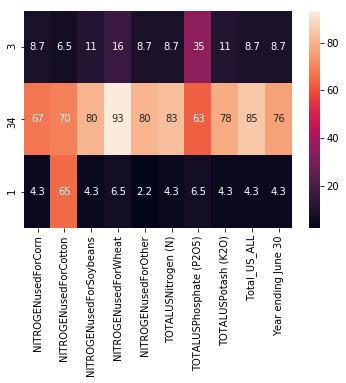

In [23]:
import seaborn as sns

percentiles_data = 100*data.rank(pct=True)
percentiles_samples = percentiles_data.iloc[indices]
sns.heatmap(percentiles_samples, annot=True)

### Implementation: Feature Relevance


In [24]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
# features = samples.drop(['Detergents_Paper'],1)
# wildcard = samples['Detergents_Paper']

# Post-Review Revised Code

features = data.drop(['Year ending June 30'],1)
wildcard = data['Year ending June 30']

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, wildcard, test_size=0.25, random_state=23)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=2, random_state=23)
regressor.fit(X_train, y_train)
results = regressor.predict(X_test)
display(results)
# TODO: Report the score of the prediction using the testing set
from sklearn.metrics import r2_score
score = regressor.score(X_test, y_test)
print "score"
display(score)

array([2004.66666667, 1985.25      , 1970.81818182, 1985.25      ,
       2004.66666667, 1995.88888889, 1970.81818182, 1995.88888889,
       1970.81818182, 1970.81818182, 1985.25      , 1970.81818182])

score


0.7642729654885551

### Highlight: Predictions of ...Type

* Which feature did you attempt to predict?


* What was the reported prediction score? 




**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

### Visualize Feature Distributions


## To get a better understanding of the dataset, review the scatter matrix of each of the features present in the data. 

If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

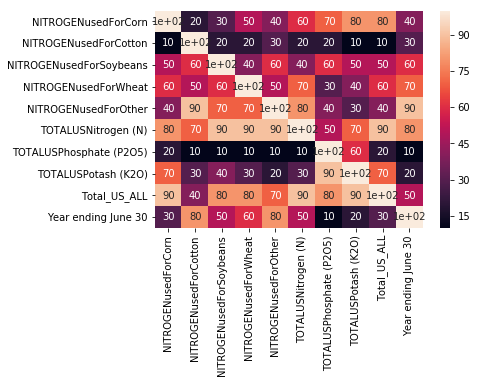

In [40]:
data.corr()


#REVISED POST-REVIEW CODE

customHeatmapdata = data.corr()

custom_data = 100*customHeatmapdata.rank(pct=True)
custom_samples = custom_data
sns.heatmap(custom_samples, annot=True)

**Answer:**

*Are there any pairs of features which exhibit some degree of correlation?*


*Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict?* 



## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.


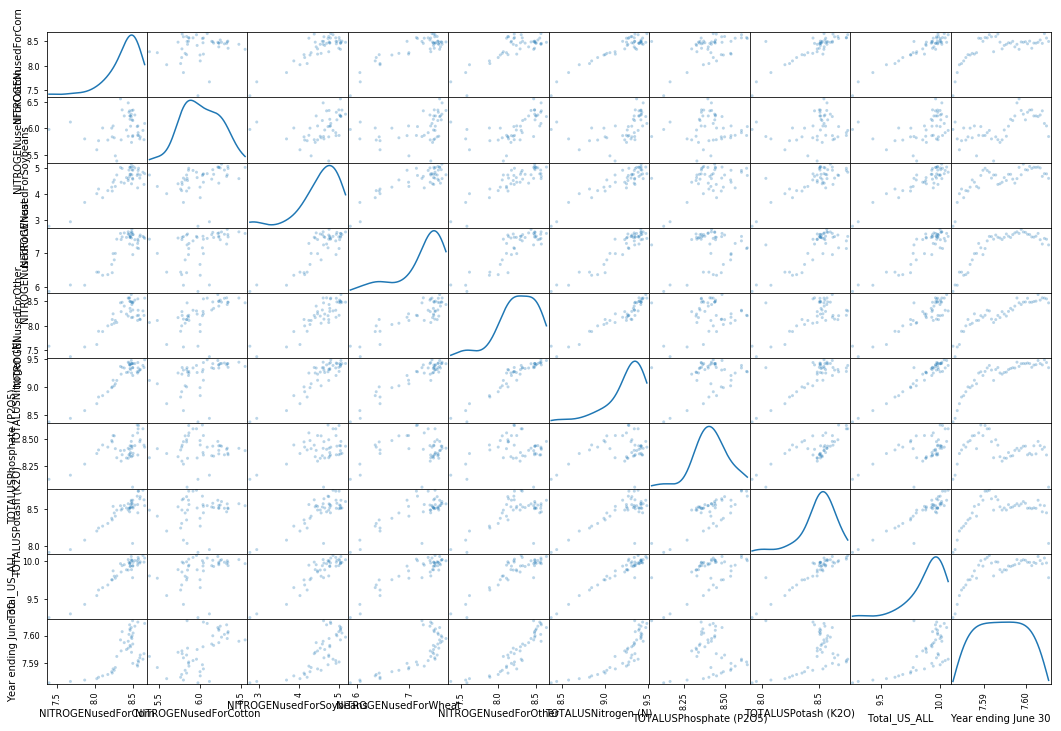

In [26]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (18,12), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).


In [27]:
# Display the log-transformed sample data
display(log_samples)

,NITROGENusedForCorn,NITROGENusedForCotton,NITROGENusedForSoybeans,NITROGENusedForWheat,NITROGENusedForOther,TOTALUSNitrogen (N),TOTALUSPhosphate (P2O5),TOTALUSPotash (K2O),Total_US_ALL,Year ending June 30
6,8.166216,5.777652,4.143135,6.363028,7.997663,8.917177,8.428143,8.303009,9.684585,7.585789
43,8.650675,6.089045,4.795791,7.431892,8.561975,9.487517,8.427706,8.543446,10.038849,7.604396
28,8.494334,6.144186,4.584967,7.543803,8.320205,9.345396,8.347116,8.525558,9.938179,7.596894
39,8.457443,6.230481,5.036953,7.497762,8.500250,9.400299,8.364275,8.507143,9.968010,7.602401
20,8.592486,5.837730,4.744932,7.531552,8.124743,9.313979,8.497195,8.665096,9.989206,7.592870


In [28]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # POST-REVIEW
    # I used the feedback to directly reference the feature upon which
    # we are iterating in the code above.
    # Still having trouble getting 42 Tukey outliers in total.
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    
    # POST-REVIEW CORRECTED STEP CALC
    step = 1.5*(Q3 - Q1)
    # The code below is from link below, and inspired my answer.
    # https://stackoverflow.com/questions/23228244/how-do-you-find-the-iqr-in-numpy
    # q75, q25 = np.percentile(x, [75 ,25])
    # iqr = q75 - q25
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
# CLARIFICATION: I Identify Outliers Here and remove them from the .csv input file
outliers  = [0]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'NITROGENusedForCorn':


,NITROGENusedForCorn,NITROGENusedForCotton,NITROGENusedForSoybeans,NITROGENusedForWheat,NITROGENusedForOther,TOTALUSNitrogen (N),TOTALUSPhosphate (P2O5),TOTALUSPotash (K2O),Total_US_ALL,Year ending June 30
1,7.673688,6.115892,2.944439,6.056784,7.370860,8.442254,8.163941,7.949797,9.304286,7.583248
2,7.861727,5.799093,3.688879,6.049733,7.567863,8.580356,8.267962,8.077447,9.429074,7.583756
0,7.392032,5.976351,2.772589,5.866468,7.584265,8.378621,8.125039,7.912057,9.255314,7.582738


Data points considered outliers for the feature 'NITROGENusedForCotton':


,NITROGENusedForCorn,NITROGENusedForCotton,NITROGENusedForSoybeans,NITROGENusedForWheat,NITROGENusedForOther,TOTALUSNitrogen (N),TOTALUSPhosphate (P2O5),TOTALUSPotash (K2O),Total_US_ALL,Year ending June 30


Data points considered outliers for the feature 'NITROGENusedForSoybeans':


,NITROGENusedForCorn,NITROGENusedForCotton,NITROGENusedForSoybeans,NITROGENusedForWheat,NITROGENusedForOther,TOTALUSNitrogen (N),TOTALUSPhosphate (P2O5),TOTALUSPotash (K2O),Total_US_ALL,Year ending June 30
1,7.673688,6.115892,2.944439,6.056784,7.370860,8.442254,8.163941,7.949797,9.304286,7.583248
0,7.392032,5.976351,2.772589,5.866468,7.584265,8.378621,8.125039,7.912057,9.255314,7.582738


Data points considered outliers for the feature 'NITROGENusedForWheat':


,NITROGENusedForCorn,NITROGENusedForCotton,NITROGENusedForSoybeans,NITROGENusedForWheat,NITROGENusedForOther,TOTALUSNitrogen (N),TOTALUSPhosphate (P2O5),TOTALUSPotash (K2O),Total_US_ALL,Year ending June 30
1,7.673688,6.115892,2.944439,6.056784,7.370860,8.442254,8.163941,7.949797,9.304286,7.583248
2,7.861727,5.799093,3.688879,6.049733,7.567863,8.580356,8.267962,8.077447,9.429074,7.583756
0,7.392032,5.976351,2.772589,5.866468,7.584265,8.378621,8.125039,7.912057,9.255314,7.582738


Data points considered outliers for the feature 'NITROGENusedForOther':


,NITROGENusedForCorn,NITROGENusedForCotton,NITROGENusedForSoybeans,NITROGENusedForWheat,NITROGENusedForOther,TOTALUSNitrogen (N),TOTALUSPhosphate (P2O5),TOTALUSPotash (K2O),Total_US_ALL,Year ending June 30
1,7.673688,6.115892,2.944439,6.056784,7.37086,8.442254,8.163941,7.949797,9.304286,7.583248


Data points considered outliers for the feature 'TOTALUSNitrogen (N)':


,NITROGENusedForCorn,NITROGENusedForCotton,NITROGENusedForSoybeans,NITROGENusedForWheat,NITROGENusedForOther,TOTALUSNitrogen (N),TOTALUSPhosphate (P2O5),TOTALUSPotash (K2O),Total_US_ALL,Year ending June 30
3,8.020928,5.594711,4.025352,6.436150,7.618251,8.704005,8.367532,8.200288,9.544954,7.584265
1,7.673688,6.115892,2.944439,6.056784,7.370860,8.442254,8.163941,7.949797,9.304286,7.583248
2,7.861727,5.799093,3.688879,6.049733,7.567863,8.580356,8.267962,8.077447,9.429074,7.583756
0,7.392032,5.976351,2.772589,5.866468,7.584265,8.378621,8.125039,7.912057,9.255314,7.582738


Data points considered outliers for the feature 'TOTALUSPhosphate (P2O5)':


,NITROGENusedForCorn,NITROGENusedForCotton,NITROGENusedForSoybeans,NITROGENusedForWheat,NITROGENusedForOther,TOTALUSNitrogen (N),TOTALUSPhosphate (P2O5),TOTALUSPotash (K2O),Total_US_ALL,Year ending June 30
1,7.673688,6.115892,2.944439,6.056784,7.370860,8.442254,8.163941,7.949797,9.304286,7.583248
0,7.392032,5.976351,2.772589,5.866468,7.584265,8.378621,8.125039,7.912057,9.255314,7.582738
45,8.491875,5.843544,4.615121,7.239933,8.465057,9.346705,8.051341,8.033009,9.780133,7.605392


Data points considered outliers for the feature 'TOTALUSPotash (K2O)':


,NITROGENusedForCorn,NITROGENusedForCotton,NITROGENusedForSoybeans,NITROGENusedForWheat,NITROGENusedForOther,TOTALUSNitrogen (N),TOTALUSPhosphate (P2O5),TOTALUSPotash (K2O),Total_US_ALL,Year ending June 30
3,8.020928,5.594711,4.025352,6.436150,7.618251,8.704005,8.367532,8.200288,9.544954,7.584265
1,7.673688,6.115892,2.944439,6.056784,7.370860,8.442254,8.163941,7.949797,9.304286,7.583248
2,7.861727,5.799093,3.688879,6.049733,7.567863,8.580356,8.267962,8.077447,9.429074,7.583756
0,7.392032,5.976351,2.772589,5.866468,7.584265,8.378621,8.125039,7.912057,9.255314,7.582738
4,8.044305,5.765191,4.204693,6.436150,7.887209,8.822912,8.401333,8.240913,9.618070,7.584773
45,8.491875,5.843544,4.615121,7.239933,8.465057,9.346705,8.051341,8.033009,9.780133,7.605392


Data points considered outliers for the feature 'Total_US_ALL':


,NITROGENusedForCorn,NITROGENusedForCotton,NITROGENusedForSoybeans,NITROGENusedForWheat,NITROGENusedForOther,TOTALUSNitrogen (N),TOTALUSPhosphate (P2O5),TOTALUSPotash (K2O),Total_US_ALL,Year ending June 30
1,7.673688,6.115892,2.944439,6.056784,7.370860,8.442254,8.163941,7.949797,9.304286,7.583248
2,7.861727,5.799093,3.688879,6.049733,7.567863,8.580356,8.267962,8.077447,9.429074,7.583756
0,7.392032,5.976351,2.772589,5.866468,7.584265,8.378621,8.125039,7.912057,9.255314,7.582738


Data points considered outliers for the feature 'Year ending June 30':


,NITROGENusedForCorn,NITROGENusedForCotton,NITROGENusedForSoybeans,NITROGENusedForWheat,NITROGENusedForOther,TOTALUSNitrogen (N),TOTALUSPhosphate (P2O5),TOTALUSPotash (K2O),Total_US_ALL,Year ending June 30


PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


,Explained Variance,NITROGENusedForCorn,NITROGENusedForCotton,NITROGENusedForSoybeans,NITROGENusedForWheat,NITROGENusedForOther,TOTALUSNitrogen (N),TOTALUSPhosphate (P2O5),TOTALUSPotash (K2O),Total_US_ALL,Year ending June 30
Dimension 1,0.8301,-0.2706,-0.1251,-0.5626,-0.5569,-0.3146,-0.3148,-0.0534,-0.1907,-0.2171,-0.0062
Dimension 2,0.9037,-0.0099,-0.9490,-0.3121,-0.6989,-0.5782,-0.3607,0.1657,0.0225,-0.1448,-0.0162
Dimension 3,0.9534,0.0856,-1.2551,-0.9147,-0.0161,-0.6863,-0.2822,-0.0563,0.0035,-0.1634,-0.0140
Dimension 4,0.9787,-0.1478,-1.5894,-0.5363,0.0400,-0.4915,-0.3208,-0.5906,-0.5398,-0.4224,0.0010


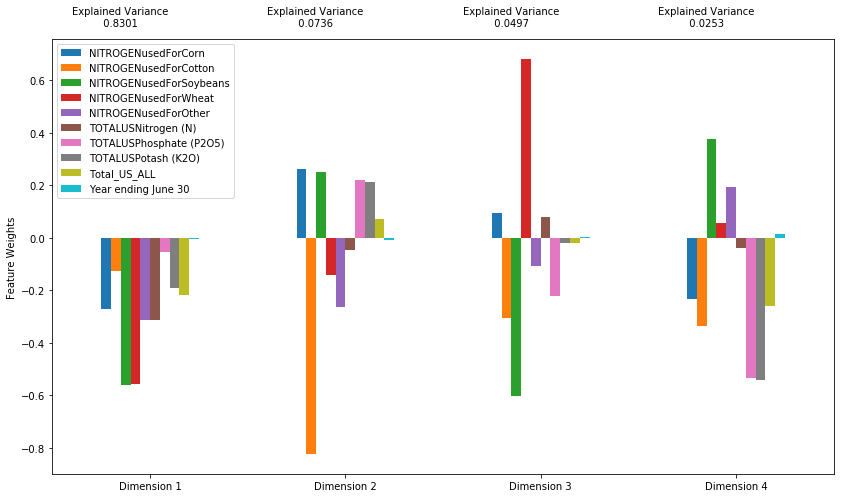

In [30]:
# I referenced the below page for this section
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=4)
print(pca)
# Below: just making 100% sure my dimensions=features
#print log_samples
# TODO: Transform log_samples using the PCA fit above
# FIXED AFTER FIRST REVIEW
pca.fit(good_data)
pca_samples = pca.transform(log_samples)
# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)
# after 4 days of trying to answer the next question set, I found this:
display(pca_results.cumsum())

In [31]:

# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4
0,1.0080,0.1739,-0.2585,0.0168
1,-0.6044,-0.0429,0.0017,-0.0275
2,-0.3623,-0.1562,0.2084,-0.0458
3,-0.6696,-0.1652,-0.1445,0.1286
4,-0.4080,0.2830,0.1886,-0.1125


In [32]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.fit_transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [33]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 10), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.007986,0.173949
1,-0.604442,-0.042867
2,-0.362335,-0.156170
3,-0.669621,-0.165165
4,-0.408034,0.283037


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

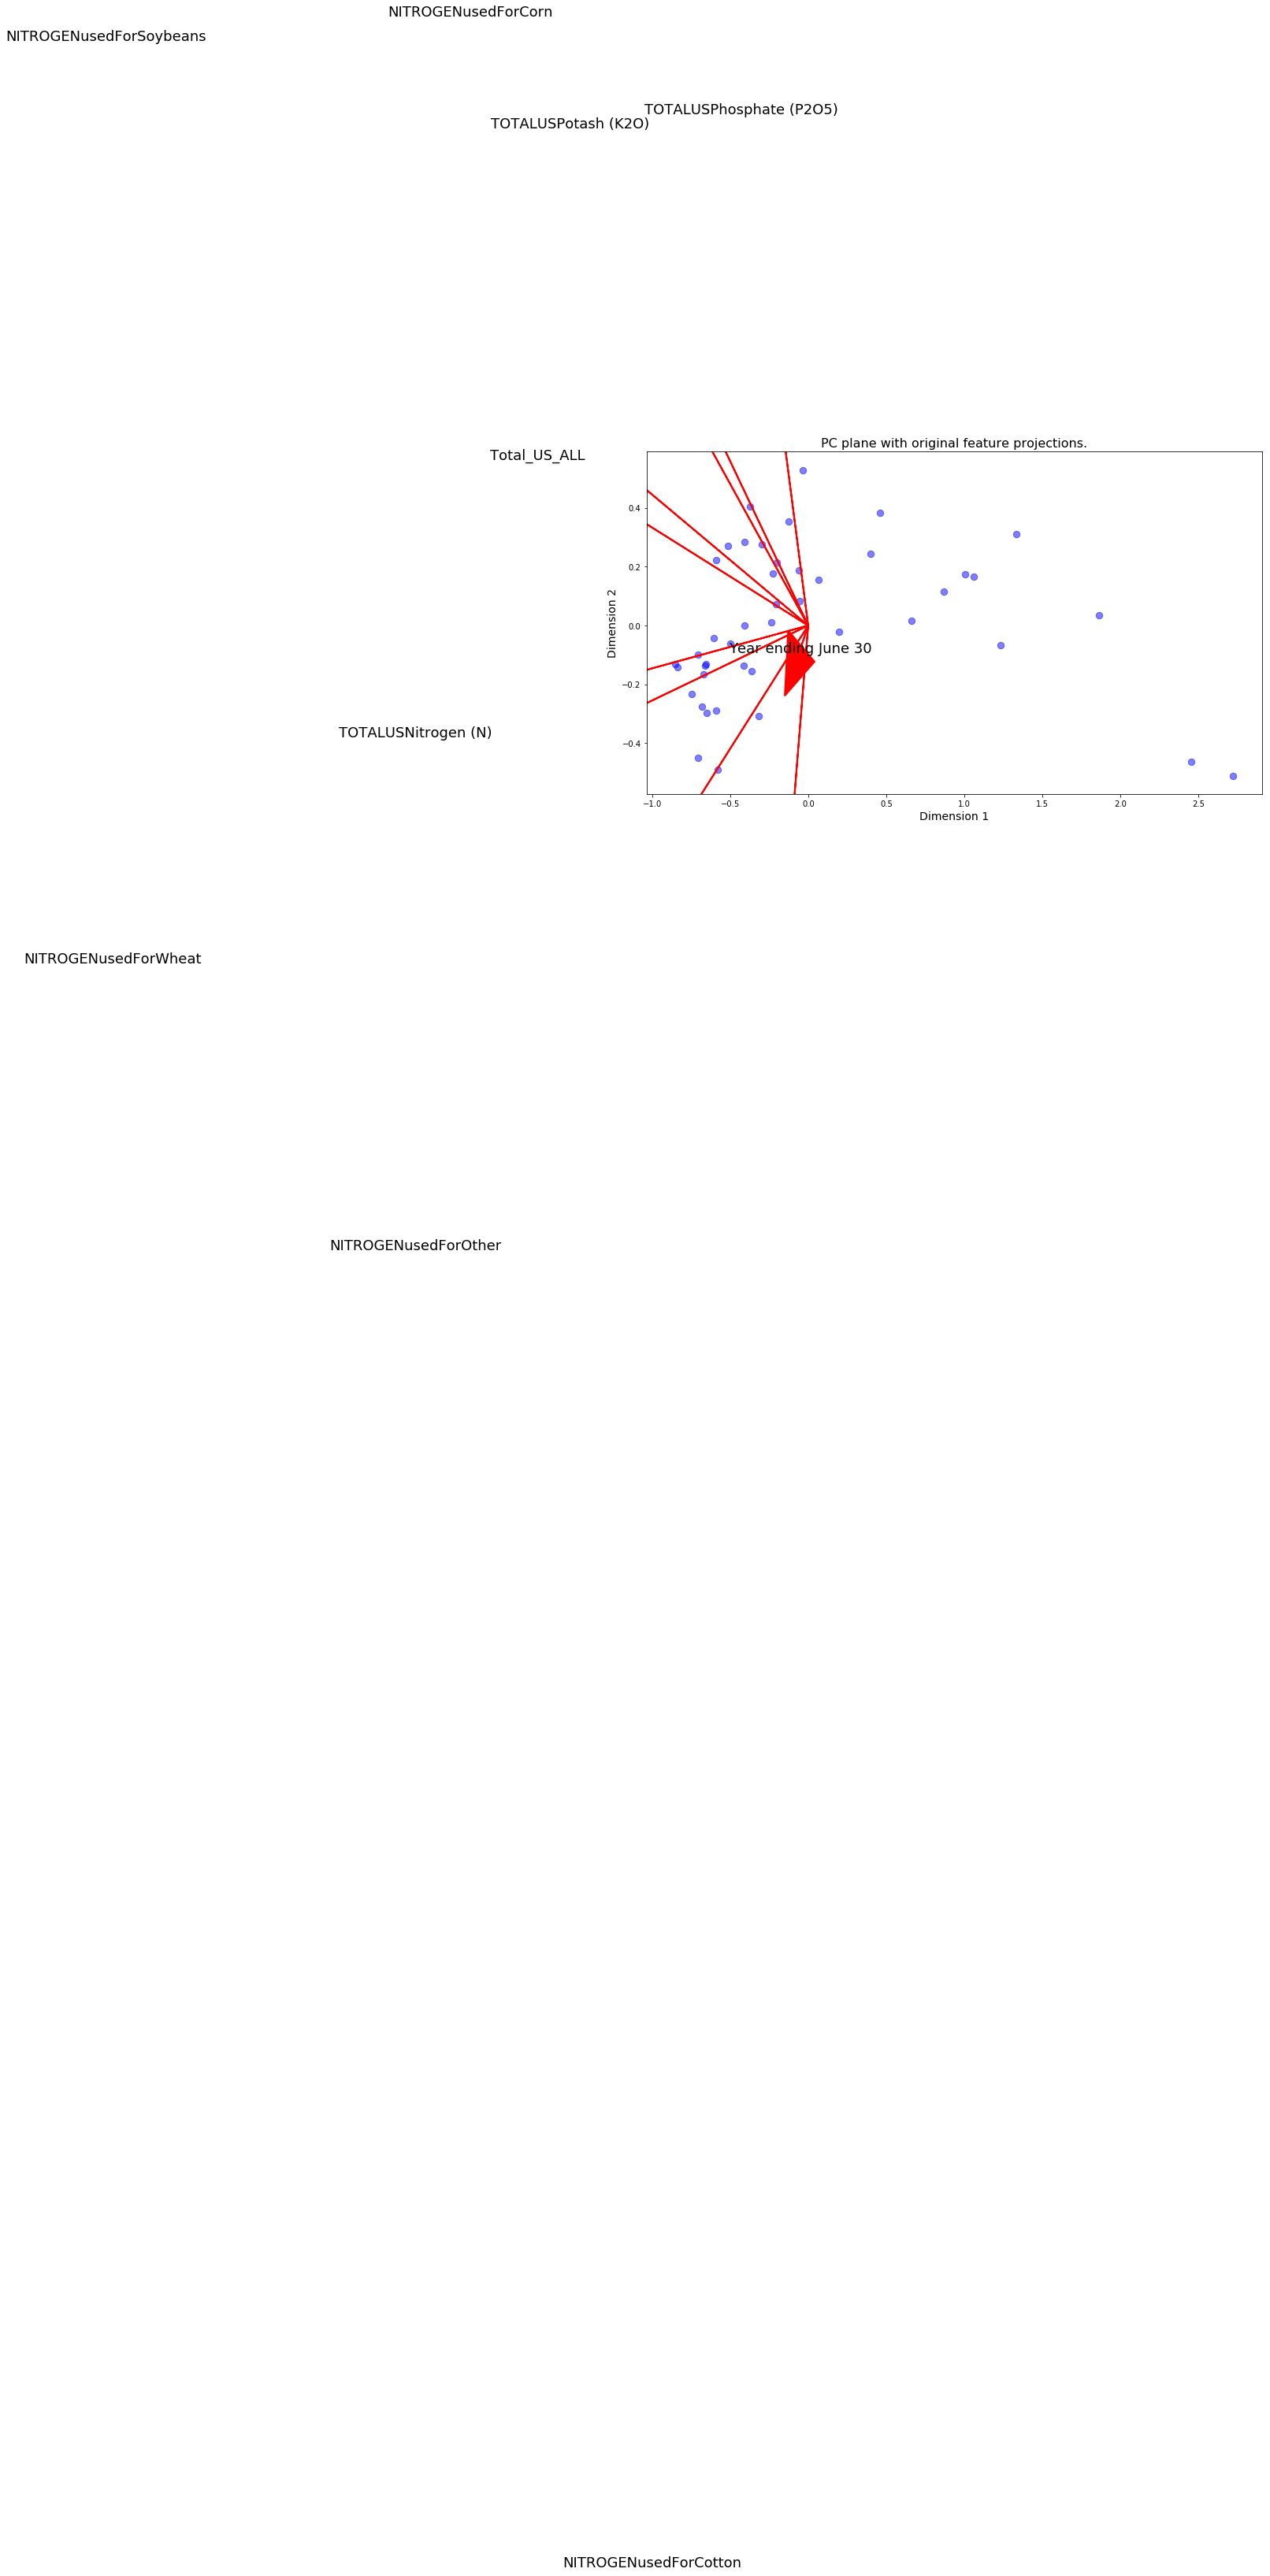

In [34]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

In [35]:
### from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import KMeans


clusterer = KMeans(n_clusters=2, random_state=23).fit(reduced_data)


preds = clusterer.predict(reduced_data)

# Find the cluster centers
# https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
centers = clusterer.cluster_centers_


sample_preds = clusterer.predict(pca_samples)


labels = clusterer.labels_
score = metrics.silhouette_score(reduced_data, labels)
print score


0.6624051432328094


**Scores for Cluster Qty Variance:**
Clusters = 2 then silhouette score = 0.48 Clusters = 4 then silhouette score = 0.38 Clusters = 6 then silhouette score = 0.38


Best silhouette score? 2

### Cluster Visualization

IndexError: too many indices for array

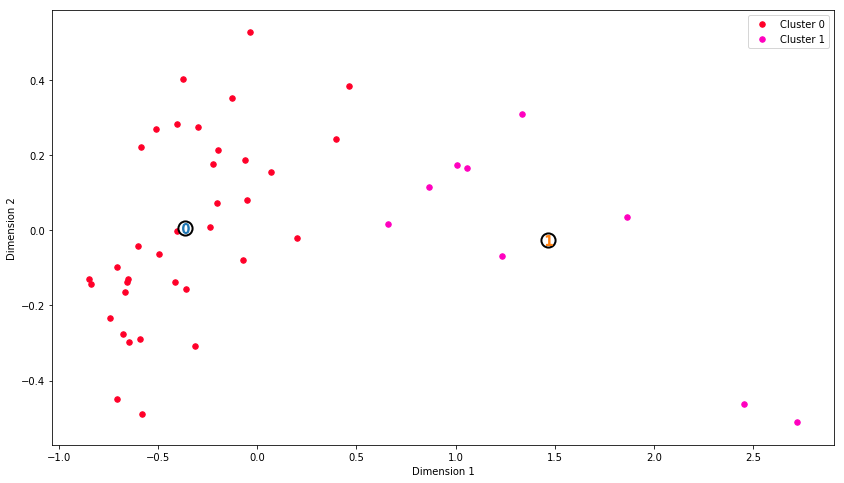

In [36]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers,sample_preds)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [37]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,NITROGENusedForCorn,NITROGENusedForCotton,NITROGENusedForSoybeans,NITROGENusedForWheat,NITROGENusedForOther,TOTALUSNitrogen (N),TOTALUSPhosphate (P2O5),TOTALUSPotash (K2O),Total_US_ALL,Year ending June 30
Segment 0,4760.0,421.0,117.0,1618.0,4192.0,11179.0,4588.0,5136.0,20972.0,1990.0
Segment 1,2874.0,343.0,41.0,585.0,2373.0,6283.0,4132.0,3596.0,14049.0,1968.0


**Conclusions:**

# What set of establishments could each of the  segments represent?

Segment 0 has a disproportionate share of X vs all other features. This leads me to believe that it is Y

Segment 1 has a disproportionate amount A, leading me to believe it is B.

### Conclusion Verification

* For each sample point, which *shipping segment from best represents it? 

* Are the predictions for each sample point consistent with this?*


In [38]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0
Sample point 3 predicted to be in Cluster 0
Sample point 4 predicted to be in Cluster 0


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

In [39]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers,2)

Dataset could not be loaded. Is the file missing?


False